<center>

# <font size="6" color="darkblue">Trabalho Laboratorial 2</font>

<br><br>

## <font size="4" color="black">Instituto Superior de Engenharia de Lisboa</font>

### Aprendizagem Automática

#### Docente: G. Marques

<br>

#### Realizado por:

<p style="text-align: center;"><font size="3">Belarmino Rafael Sacate nº: 52057</font></p>

<p style="text-align: center;"><font size="3">Miguel Ferreira nº: 51878</font></p>

<br><br>

#### Data: 23 de Dezembro de 2025

<br><br><br>

</center>

---
# Introducao

---
# Imports

In [272]:
import pickle
import numpy as np

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re

---
# Leitura do dataset

In [273]:
fn ="imdbFull.p"
D = pickle.load(open(fn , 'rb'))
D.keys()

dict_keys(['data', 'target', 'DESCR'])

In [274]:
Docs = D.data
y = D.target

---
# Leitura do Docs a bruto(sem filtragem)

Numa primeira fase, recorremos a funcao TfidfVectorizer() sem parametros de filtragem para podermos perceber com que tipo de texto estamos a tratar, para depois conseguirmos identificar que tipo de filtragens poderao ser implementadas.

In [275]:
tfidf = TfidfVectorizer().fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

101895


aqui podemos observar que temos cerca de 101895 tonkens, dos quais temos:


- Elementos que como underscores; 

- caracteres numericos, entre outros;

Estes serao retirados no processo de filtragem, que sera essencial para a limpeza do documento reduzindo o tamanho do mesmo e selecionando somente informacoes mais relevantes.

In [276]:
tokens[1200:1500]

array(['6200', '62229249', '623', '624', '63', '637', '63rd', '64', '65',
       '651', '65m', '65mm', '66', '660', '6600f', '666', '66er', '66p',
       '66th', '67', '6723', '678', '67th', '68', '68th', '69', '69ing',
       '69p', '69th', '6am', '6b', '6f', '6ft', '6hours', '6k', '6m',
       '6million', '6pm', '6th', '6wks', '6yo', '6yrs', '70', '700',
       '7000', '70000', '700k', '701', '70369862', '707', '70ies', '70km',
       '70m', '70mm', '70p', '70s', '70th', '70õs', '71', '710', '713',
       '72', '720', '727', '729', '72nd', '73', '7300', '735', '737',
       '73min', '74', '740', '740il', '747', '747s', '74sooner', '74th',
       '75', '750', '75054', '757', '75c', '75m', '75min', '76', '7600',
       '762', '767', '77', '775', '78', '788', '78rpm', '79', '79th',
       '7c', '7days', '7even', '7eventy', '7ft', '7ish', '7m', '7million',
       '7mm', '7s', '7th', '7½', '7½th', '80', '800', '8000', '802',
       '80ies', '80ish', '80min', '80s', '80yr', '81', '810', '8

Exemplo de doc antes da limpeza, elementos que como tags html que sao desnecessarios no nosso caso pois os estao a ocupar espaco.

In [277]:
d = Docs[0]
d

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

---
# Limpeza dos Docs

Para a limpeza dos dados foi efectuada em 2 etapas:

- Primeira Etapa

    Substituicao de tags html por espacos vazios e


    na selecao de somente caracteres afabeticos, e acentos nas linguas latinas


- Segunda Etapa

    uso da funcao TfidfVectorizer para selecionar palavras que ocorrem no minimo 5 vezes entre os Docs e que tenham 4 ou mais cararacteres, eliminando assim casos como por exemplo: "the, a" etc etc

In [278]:
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

In [279]:
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

35205


Apos, a limpeza dos docs podemos notar uma dimuicao consideravel saimos de 101895 tokens para 
35205

display dos 100 primeiros tokens apos a limpeza e filtragem

In [280]:
tokens[:100]

array(['aaargh', 'aaliyah', 'aames', 'aamir', 'aankhen', 'aapke',
       'aardman', 'aaron', 'aback', 'abandon', 'abandoned', 'abandoning',
       'abandonment', 'abandons', 'abba', 'abbas', 'abbey', 'abbie',
       'abbot', 'abbott', 'abbreviated', 'abby', 'abdomen', 'abduct',
       'abducted', 'abducting', 'abduction', 'abductions', 'abductor',
       'abducts', 'abdul', 'abel', 'aberration', 'aberrations', 'abetted',
       'abhay', 'abhishek', 'abhorrent', 'abhors', 'abide', 'abiding',
       'abigail', 'abilities', 'ability', 'abit', 'abject', 'ablaze',
       'able', 'ably', 'abner', 'abnormal', 'abnormally', 'aboard',
       'abode', 'abolished', 'abominable', 'abominably', 'abomination',
       'abominations', 'aboriginal', 'aboriginals', 'aborigine',
       'aborigines', 'abort', 'aborted', 'abortion', 'abortions',
       'abortive', 'abound', 'abounds', 'about', 'above', 'abraham',
       'abrahams', 'abrams', 'abrasive', 'abre', 'abridged', 'abril',
       'abroad', 'abrupt

display do mesmo docs previamente ilustrado, mas desta vez limpo.

In [281]:
d = Docs[0]
d

'Zero Day leads you to think even re think why two boys young men would do what they did commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had it is a remarkable product In terms of explaining the motives and actions of the two young suicide murderers it is better than Elephant in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty '

Apos a limpeza dos dados, foi feita a reducao de tokens com certa similaridade a um so token recorrendo ao PorterStemmer, consigos reduzir ainda mais os tokens saindo de 35205 para 30954

---
# Stemmers

In [282]:
from nltk.stem import PorterStemmer

stemFunc = PorterStemmer()
voc = tfidf.get_feature_names_out()
voc2 = [stemFunc.stem(w) for w in voc]

In [283]:
from nltk.stem import PorterStemmer
stemFunc = PorterStemmer()
Docs2 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs]

tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs2)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

30954


In [284]:
print(tokens[:150])

['aaa' 'aaah' 'aaargh' 'aag' 'aah' 'aaliyah' 'aam' 'aamir' 'aankhen'
 'aapk' 'aardman' 'aargh' 'aaron' 'aatish' 'aback' 'abandon' 'abba'
 'abbey' 'abbi' 'abbot' 'abbott' 'abbrevi' 'abc' 'abdalla' 'abdic'
 'abdomen' 'abduct' 'abductor' 'abdul' 'abdullah' 'abe' 'abel'
 'abercrombi' 'aberdeen' 'abernathi' 'abernethi' 'aberr' 'abet' 'abhay'
 'abhi' 'abhishek' 'abhor' 'abhorr' 'abi' 'abid' 'abigail' 'abil' 'abit'
 'abject' 'abl' 'ablaz' 'abli' 'abner' 'abnorm' 'abo' 'aboard' 'abod'
 'abolish' 'abolit' 'abolitionist' 'abomin' 'aborigin' 'abort'
 'abortionist' 'abound' 'about' 'abov' 'abr' 'abraham' 'abram' 'abras'
 'abreast' 'abridg' 'abril' 'abroad' 'abrupt' 'abruptli' 'abscond'
 'absenc' 'absent' 'absente' 'absentia' 'absolut' 'absolutley' 'absolutli'
 'absolv' 'absorb' 'absorpt' 'abstain' 'abstin' 'abstract' 'absurd'
 'absurdist' 'absurdli' 'abu' 'abund' 'abundantli' 'abus' 'abut' 'abuzz'
 'abysm' 'abyss' 'acacia' 'acadami' 'academ' 'academi' 'academia'
 'acapulco' 'acced' 'acceler' 'acce

---
# Representacao tf-idf

In [285]:
x = tfidf.transform(Docs2)
print(x.shape, type(x))

(50000, 30954) <class 'scipy.sparse._csr.csr_matrix'>


In [286]:
print(tokens[:100])

['aaa' 'aaah' 'aaargh' 'aag' 'aah' 'aaliyah' 'aam' 'aamir' 'aankhen'
 'aapk' 'aardman' 'aargh' 'aaron' 'aatish' 'aback' 'abandon' 'abba'
 'abbey' 'abbi' 'abbot' 'abbott' 'abbrevi' 'abc' 'abdalla' 'abdic'
 'abdomen' 'abduct' 'abductor' 'abdul' 'abdullah' 'abe' 'abel'
 'abercrombi' 'aberdeen' 'abernathi' 'abernethi' 'aberr' 'abet' 'abhay'
 'abhi' 'abhishek' 'abhor' 'abhorr' 'abi' 'abid' 'abigail' 'abil' 'abit'
 'abject' 'abl' 'ablaz' 'abli' 'abner' 'abnorm' 'abo' 'aboard' 'abod'
 'abolish' 'abolit' 'abolitionist' 'abomin' 'aborigin' 'abort'
 'abortionist' 'abound' 'about' 'abov' 'abr' 'abraham' 'abram' 'abras'
 'abreast' 'abridg' 'abril' 'abroad' 'abrupt' 'abruptli' 'abscond'
 'absenc' 'absent' 'absente' 'absentia' 'absolut' 'absolutley' 'absolutli'
 'absolv' 'absorb' 'absorpt' 'abstain' 'abstin' 'abstract' 'absurd'
 'absurdist' 'absurdli' 'abu' 'abund' 'abundantli' 'abus' 'abut' 'abuzz']


Organizacao das palavras em ordem crescente, tendo em conta a ordenacao do tfidf.

In [287]:
xM = np.max(x,axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]

print das palavras que o modelo tfidx considera mais importantes.

In [288]:
print(voc[:100])

['pokemon', 'ghouli', 'dalmat', 'scanner', 'robot', 'uzumaki', 'doodlebop', 'bad', 'esperanto', 'cycl', 'critter', 'rodrigu', 'ernest', 'smallvil', 'nuke', 'sasquatch', 'wei', 'steve', 'lupin', 'tarzan', 'darkman', 'primari', 'zatoichi', 'woo', 'bye', 'colombo', 'shark', 'prot', 'kibbutz', 'farscap', 'wirey', 'shemp', 'fujimori', 'muppet', 'barney', 'akasha', 'gamera', 'columbo', 'joke', 'lennon', 'botch', 'woodburi', 'knott', 'brendan', 'weller', 'brynner', 'custer', 'rajni', 'hackenstein', 'wine', 'melt', 'naschi', 'ninja', 'gadget', 'dahmer', 'gruner', 'matrix', 'twelv', 'beller', 'othello', 'cypher', 'dariu', 'stepford', 'vestron', 'blah', 'duvivi', 'twister', 'hanzo', 'srk', 'pasteur', 'django', 'zizek', 'dev', 'marti', 'dean', 'fabian', 'beetl', 'moto', 'tibb', 'gein', 'speck', 'hallam', 'winfield', 'janean', 'marathon', 'biko', 'and', 'noriko', 'suck', 'skate', 'seagal', 'genova', 'worm', 'alvin', 'game', 'camp', 'killjoy', 'kronk', 'sherpa', 'vick']


print das palavras que o modelo tfidx considera menos importantes.

In [289]:
print(voc[-100:])

['gayatri', 'hiroshi', 'candidli', 'gazett', 'encamp', 'acced', 'suwa', 'beslon', 'vibrantli', 'takemitsu', 'citadel', 'lopsid', 'pintauro', 'domicil', 'pipsqueak', 'chessboard', 'motorcar', 'illusori', 'harrowingli', 'shukla', 'imposit', 'roadway', 'dykstra', 'greenland', 'wada', 'nagato', 'asahina', 'koizumi', 'traips', 'rancho', 'entreat', 'hesitantli', 'chokeslam', 'psychosomat', 'authori', 'rifleman', 'starkest', 'rateyourmus', 'awoken', 'bhatti', 'tokoro', 'megaphon', 'steamship', 'tradesmen', 'vala', 'funakoshi', 'fedor', 'nassau', 'shrubland', 'debauch', 'rueful', 'susten', 'popularis', 'accomod', 'mccowen', 'ardor', 'straightforwardli', 'zekeria', 'salesperson', 'cavalryman', 'sohrab', 'seydou', 'rowboat', 'purvey', 'perrier', 'unpleasantri', 'homayoun', 'mahmoodzada', 'ershadi', 'underpaid', 'prettifi', 'perfidi', 'undercard', 'gurind', 'choisi', 'turnout', 'zantara', 'readout', 'yammer', 'cartograph', 'bandekar', 'seminarian', 'pasternak', 'invocu', 'ddt', 'cavendish', 'arro

Como podemos notar existem palavras que foram muito reduzidas ao utilizarmos o PorterStemmer, e abaixo esta uma implmentacao da analise feita acima com as palavras norma

In [290]:
Docs = D.data
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names_out()
x = tfidf.transform(Docs)
xM = np.max(x, axis=0).toarray().squeeze()
idx = np.argsort(-xM)
voc = [tokens[i] for i in idx]

print das palavras que o modelo tfidx considera mais importantes (sem PorterStemmer)

In [291]:
print(voc[:100])

['pokemon', 'scanners', 'robot', 'ghoulies', 'cycle', 'lupin', 'ernest', 'doodlebops', 'dalmations', 'critters', 'rodrigues', 'gamera', 'steve', 'tarzan', 'darkman', 'smallville', 'prot', 'fujimori', 'wine', 'sasquatch', 'jokes', 'demons', 'xica', 'casper', 'zatoichi', 'colombo', 'farscape', 'lennon', 'akasha', 'barney', 'cypher', 'wirey', 'sucks', 'gadget', 'custer', 'primary', 'weller', 'speck', 'shemp', 'naschy', 'brynner', 'janeane', 'worms', 'noriko', 'match', 'hackenstein', 'woodbury', 'ants', 'shark', 'botched', 'zizek', 'priya', 'dean', 'othello', 'stepford', 'game', 'marty', 'khouri', 'ninja', 'blah', 'gruner', 'brendan', 'duvivier', 'hanzo', 'matrix', 'elvira', 'paulie', 'alvin', 'joan', 'muppet', 'chiba', 'darius', 'killjoy', 'tanner', 'nemesis', 'nuke', 'hallam', 'gein', 'leonora', 'karloff', 'lexi', 'fabian', 'beatles', 'oprah', 'sissy', 'dentist', 'pack', 'cream', 'tyrannosaurus', 'zombi', 'coop', 'twelve', 'flea', 'buddy', 'blob', 'azumi', 'keaton', 'karen', 'alaska', 'm

print das palavras que o modelo tfidx considera menos importantes (sem PorterStemmer)

In [292]:
print(voc[-100:])

['cineplex', 'denigrating', 'emotes', 'understudy', 'credo', 'vertical', 'astride', 'backfire', 'chaplinesque', 'kinship', 'goads', 'yokels', 'radiating', 'puncture', 'unsupervised', 'compounds', 'proletariat', 'eatery', 'perpetrating', 'firecracker', 'organically', 'everyway', 'elaborating', 'slavering', 'immunity', 'plucking', 'boating', 'alphaville', 'tacks', 'whelan', 'cataclysmic', 'gingerly', 'scuppered', 'brims', 'dinky', 'unerring', 'père', 'subtracted', 'bafflingly', 'britt', 'striding', 'assassinates', 'bluntness', 'relinquishing', 'basking', 'sprang', 'rigging', 'allocated', 'alloy', 'nyree', 'entanglements', 'confections', 'nouveau', 'unmentioned', 'emits', 'ulliel', 'imposition', 'mclaughlin', 'unarguably', 'cardinals', 'schemer', 'imbuing', 'sharpshooter', 'luncheon', 'pervasively', 'auspicious', 'clarifying', 'institutionalised', 'sylvain', 'obstruction', 'expensively', 'indicted', 'devising', 'manoeuvre', 'vexed', 'galadriel', 'scolded', 'chokeslam', 'inscribed', 'bally

O modelo tdfidf considera essas palavras menos importantes pois elas aparecem em muitas e muitas criticas

agora fazemos o contrario recorrendo ao inverse document frequency.


quao mais baixo for o idf mais for o valor deste termo mais vezes a palavra aparece.

As palavras abaixo sao as palavras que aparecem mais vezes independemente da critica ser boa ou ma.

In [293]:
idf = tfidf.idf_ 
idx = np.argsort(idf)
voc=[tokens[i] for i in idx]
print(voc[:100])

['this', 'that', 'with', 'movie', 'have', 'film', 'from', 'like', 'they', 'there', 'just', 'about', 'what', 'some', 'good', 'when', 'more', 'time', 'very', 'even', 'only', 'would', 'really', 'well', 'which', 'story', 'much', 'than', 'their', 'were', 'other', 'been', 'most', 'also', 'into', 'first', 'great', 'will', 'made', 'because', 'people', 'make', 'could', 'after', 'them', 'then', 'watch', 'think', 'movies', 'acting', 'seen', 'characters', 'many', 'being', 'never', 'plot', 'know', 'ever', 'best', 'character', 'where', 'little', 'over', 'better', 'films', 'life', 'does', 'love', 'still', 'your', 'here', 'something', 'these', 'while', 'should', 'scenes', 'such', 'through', 'scene', 'back', 'watching', 'those', 'thing', 'real', 'actors', 'another', 'before', 'doesn', 'years', 'though', 'director', 'makes', 'didn', 'work', 'actually', 'look', 'find', 'nothing', 'going', 'show']


---
# Classificacao e Regressao

In [294]:
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split


stemFunc = SnowballStemmer('english')

fn ="imdbFull.p"
D = pickle.load(open(fn , 'rb'))
D.keys()
Docs = D.data
nota = D.target

Docs1, Docs2, y1, y2 = train_test_split(Docs, nota, test_size=0.3, random_state=42, stratify=nota)

Docs1 = [doc.replace('<br />', ' ') for doc in Docs1]
Docs1 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs1]
Docs1 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs1]
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs1)
x1 = tfidf.transform(Docs1)

Docs2 = [doc.replace('<br />', ' ') for doc in Docs2]
Docs2 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs2]
Docs2 = [' '.join([stemFunc.stem(w) for w in d.split()]) for d in Docs2]
x2 = tfidf.transform(Docs2)

In [295]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty = 'l2', max_iter = 1000, C = 1, tol = 1e-3)
dl.fit(x1, y1)
print(dl.score(x1, y1))
print(dl.score(x2, y2))

0.6266857142857143
0.424


Validacao Cruzada

In [296]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dl = LogisticRegression(penalty = 'l2', max_iter = 1000, C = 1, tol = 1e-3)

scores = cross_val_score(dl, x1, y1, cv=kfold)

print("\nExatidão por fold: ", scores)
print("Média: ", np.round(scores.mean(),4))
print("Desvio Padrão: ", np.round(scores.std(), 4))

# todos os dados
dl_final = LogisticRegression(penalty='l2', max_iter=1000, C=1, tol=1e-3)
dl_final.fit(x1, y1)


Exatidão por fold:  [0.41442857 0.42085714 0.42328571 0.41971429 0.41657143]
Média:  0.419
Desvio Padrão:  0.0031


,penalty,'l2'
,dual,False
,tol,0.001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [297]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dl_final.predict(x2)

# Negativa (1-4), Positiva (7-10)
print(classification_report(y2, y_pred,digits=4))

cm = confusion_matrix(y2, y_pred)
print(cm)

exatidao = dl_final.score(x2, y2)
print("Exatidão Total:", round(exatidao, 4))

# Análise de Overfitting
acc_treino = dl_final.score(x1, y1)
acc_teste = exatidao
diferenca = acc_treino - acc_teste
print("Diferença:", round(diferenca, 4))

              precision    recall  f1-score   support

           1     0.5308    0.7939    0.6362      3037
           2     0.2361    0.0865    0.1266      1376
           3     0.2550    0.1552    0.1930      1488
           4     0.3320    0.3052    0.3180      1599
           7     0.3229    0.2512    0.2826      1441
           8     0.3022    0.2560    0.2772      1758
           9     0.2179    0.0687    0.1045      1382
          10     0.4863    0.7551    0.5916      2919

    accuracy                         0.4240     15000
   macro avg     0.3354    0.3340    0.3162     15000
weighted avg     0.3710    0.4240    0.3779     15000

[[2411  141  145  153   22   33    9  123]
 [ 768  119  155  213   25   23    5   68]
 [ 590  114  231  316   62   60   13  102]
 [ 379   81  244  488  145   96   20  146]
 [  95   17   62  140  362  319   66  380]
 [  79    8   34   88  286  450  115  698]
 [  68    7   13   38  111  239   95  811]
 [ 152   17   22   34  108  269  113 2204]]
Exat

In [298]:
w = dl_final.coef_[0]
idx = np.argsort(w)
voc = tfidf.get_feature_names_out()
voc2 = [voc[i] for i in idx]
print(voc2[:50])
print('\n','-'*100,'\n')
print(voc2[-50:])

['great', 'excel', 'best', 'quit', 'beauti', 'love', 'perfect', 'recommend', 'definit', 'enjoy', 'also', 'becom', 'nice', 'fantast', 'overal', 'heart', 'today', 'brilliant', 'twist', 'differ', 'certain', 'strang', 'good', 'well', 'although', 'favorit', 'alway', 'bring', 'perform', 'pretti', 'memor', 'still', 'young', 'play', 'impress', 'more', 'though', 'awesom', 'hilari', 'amaz', 'prison', 'earli', 'funniest', 'particular', 'give', 'both', 'superb', 'most', 'almost', 'georg']

 ---------------------------------------------------------------------------------------------------- 

['complet', 'camera', 'travesti', 'entir', 'paid', 'script', 'disgust', 'laughabl', 'actor', 'trash', 'inept', 'idiot', 'asham', 'annoy', 'warn', 'lame', 'fail', 'pathet', 'rubbish', 'suppos', 'cost', 'ridicul', 'dread', 'redeem', 'appal', 'offens', 'would', 'zero', 'crap', 'couldn', 'pain', 'whatsoev', 'money', 'minut', 'stupid', 'this', 'embarrass', 'ever', 'even', 'noth', 'insult', 'garbag', 'avoid', 'bore'

78


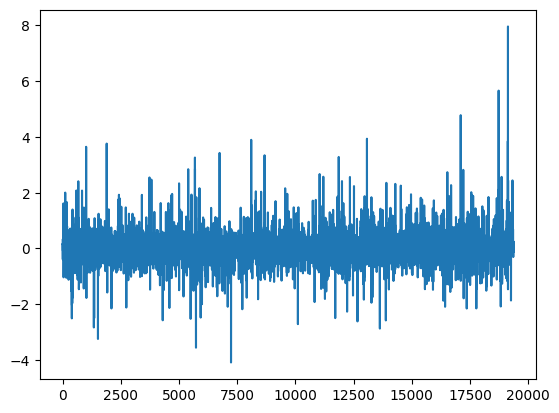

In [299]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(w)
print(np.sum(np.abs(w) <= 1e-3))

### Lasso

In [300]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty = 'l1', solver='saga', max_iter = 1000, C = 0.10, tol = 1e-3)
dl.fit(x1, y1)
print(dl.score(x1, y1))
print(dl.score(x2, y2))

0.3615714285714286
0.3621333333333333


In [301]:
w = dl.coef_[0]
idx = np.argsort(w)
print(np.sum(w!=0))
voc = tfidf.get_feature_names_out()
voc2 = [voc[i] for i in idx]
print(voc2[:50])
print('\n','-'*100,'\n')
print(voc2[-50:])

80
['great', 'also', 'veri', 'best', 'perform', 'well', 'beauti', 'play', 'quit', 'love', 'stori', 'good', 'enjoy', 'excel', 'more', 'pretti', 'young', 'recommend', 'alway', 'littl', 'which', 'still', 'much', 'some', 'though', 'although', 'with', 'nice', 'charact', 'role', 'becom', 'film', 'interest', 'abner', 'zoot', 'zorba', 'zorro', 'zosch', 'zucco', 'zucker', 'zuckerman', 'zudina', 'zulu', 'zuniga', 'zurer', 'zwart', 'zwick', 'émigré', 'abil', 'abject']

 ---------------------------------------------------------------------------------------------------- 

['zoey', 'zola', 'zombi', 'show', 'actual', 'camera', 'actor', 'suppos', 'joke', 'hour', 'script', 'write', 'complet', 'movi', 'pathet', 'pleas', 'pain', 'just', 'watch', 'onli', 'trash', 'embarrass', 'make', 'have', 'couldn', 'ridicul', 'peopl', 'your', 'suck', 'insult', 'bore', 'should', 'minut', 'noth', 'would', 'they', 'garbag', 'ever', 'wors', 'poor', 'crap', 'money', 'stupid', 'avoid', 'even', 'horribl', 'this', 'terribl', 

---
# Regressao
Nesta fase vamos tentar prever a nota exata (1 a 10) usando regressao e comparar com a classificacao.

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo_reg = LinearRegression()
modelo_reg.fit(x1, y1)

print("Score R2 (Treino):", modelo_reg.score(x1, y1))
print("Score R2 (Teste):", modelo_reg.score(x2, y2))

Score R2 (Treino): 0.8492940319053637
Score R2 (Teste): 0.17440544041394723


In [303]:
# Fazer previsoes
previsoes = modelo_reg.predict(x2)

# Erro médio quadrático
mse = mean_squared_error(y2, previsoes)

# Ver o erro medio
print("Erro Quad. Medio:", mse)

# Comparar com classificacao (arredondar as previsoes)
# Isto serve para vermos se a nota prevista arredondada bate certo com a original
previsoes_int = np.round(previsoes)
exatidao_regressao = np.mean(previsoes_arred == y2)

print("MSE (Regressão):", mse)
print("Exatidão (Regressão arredondada):", exatidao_regressao)

Erro Quad. Medio: 9.990886021313312
MSE (Regressão): 9.990886021313312
Exatidão (Regressão arredondada): 0.21973333333333334


In [304]:
previsoes = modelo_reg.predict(x2)

# Arredondamento
previsoes_arred = np.clip(np.round(previsoes), 1, 10)

# Calcular a exatidão da regressão
acertos = previsoes_arred == y2
exatidao_regressao = acertos.mean()

print("Exatidão da Classificação: ", round(acc_teste, 4))
print("Exatidão da Regressão: ", round(exatidao_regressao, 4))

Exatidão da Classificação:  0.424
Exatidão da Regressão:  0.2197


---
# Clustering
Vamos agrupar as criticas sem saber a nota, usando K-Means.

K= 2 feito...
K= 3 feito...
K= 5 feito...
K= 8 feito...
K= 10 feito...


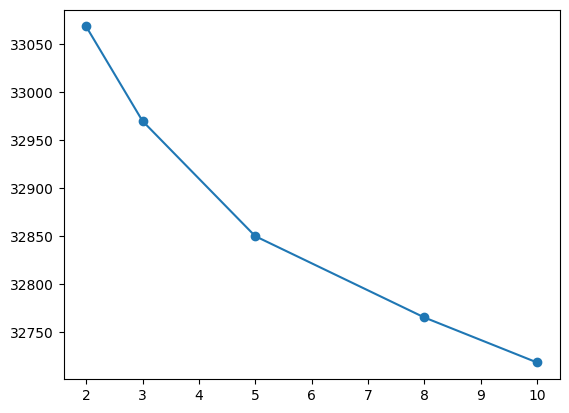

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tentar achar o melhor k (metodo do cotovelo)
inercias = []
lista_k = [2, 3, 5, 8, 10]
for k in lista_k:
    modelo_km = KMeans(n_clusters=k, random_state=42)
    modelo_km.fit(x1)
    inercias.append(modelo_km.inertia_)
    print("K = " + str(k) + " feito...")

# Plot simples para ver o cotovelo
plt.plot(lista_k, inercias, 'o-')
plt.show()

O número de clusters foi analisado através do método do cotovelo. Observou-se uma redução substantiva da inércia entre k=2 e k=5. A partir desse valor, a diminuição da inércia torna-se progressivamente menor, indicando ganhos cada vez mais pequenos com o aumento do número de clusters. Deste modo, escolheu-se k=5.

In [306]:
# Escolher um k fixo, por exemplo K=5
k_final = 5
modelo_km = KMeans(n_clusters=k_final, random_state=42)
modelo_km.fit(x1)

# Ver as palavras mais frequentes de cada grupo
print("Top palavras por cluster:")
centroides_ordenados = modelo_km.cluster_centers_.argsort()[:, ::-1]
palavras = tfidf.get_feature_names_out()

for i in range(k_final):
    print(f"Cluster {i}:")
    for ind in centroides_ordenados[i, :10]:
        print(' ', palavras[ind], end='')
    print('\n')

Top palavras por cluster:
Cluster 0:
  that  this  movi  they  with  have  there  film  like  just

Cluster 1:
  film  this  that  with  have  veri  like  there  from  good

Cluster 2:
  show  episod  that  this  seri  season  they  watch  have  with

Cluster 3:
  this  with  that  film  movi  from  have  stori  like  veri

Cluster 4:
  movi  this  that  watch  have  like  good  just  with  realli



---
# Conclusao

Neste trabalho explorámos o uso de várias técnicas para analisar as críticas de filmes no IMDB.

Usámos uma "Logistic Regression" para determinar se o filme é bom ou mau, foi atingida uma exatidão de 42.4%. Este é um resultado decente pelo que tinhamos 8 categorias possíveis. Assim, o modelo conseguiu distinguir bem entre críticas positivas e negativas, apesar de ter tido mais dificulade nas notas intermédias.

Ao tentar prever a nota exata (1-10) do filme, usando a Regressão Linear, foi atingia uma exatidão de 22% e o erro quadrático médio (mse) foi de 9.99, o que quer dizer que, em média, as previsões falham por cerca de 3 valores. Isto demonstra a dificuldade de prever a nota exata do filme apenas pelo texto das críticas.

No "clustering" aplicámos o KMeans para agrupar as críticas dos filmes sem usar as notas. Escolhemos k=5 clusters para as agrupar e foi possível verificar que o Cluster 2 era bastante distinto dos outros clusters, pelo facto de mencionar séries de TV, identificado por palavras como "episode", "season" e "series".  Os restantes clusters eram mais semelhantes entre si com palavras como "movie" e "film".

Em conclusão, foi possível classificar as críticas dos filmes em positivas e negativas e detetar alguns padrões óbvios como séries de TV e filmes.